# Life Expectancy and Its Relationship to GDP: A Data Science Project

**Alfikri Ramadhan - [LinkedIn](https://www.linkedin.com/in/alfikri-ramadhan/)**

<p style="text-align:center;"><img src="img/8358.jpg" alt="Logo" width="400"></p>

## About The Project
***
Life Expectancy, in short, refers to the number of years a person can expect to live. By definition, life expectancy is based on an estimate of the average age that members of a particular population group will be when they die ([ourworldindata.org](https://ourworldindata.org/life-expectancy-how-is-it-calculated-and-how-should-it-be-interpreted)). Life expectancy is a measure that is often used to gauge overall health of a country, and it has been a subject in many research and studies. Miladinov in his [publication](https://genus.springeropen.com/articles/10.1186/s41118-019-0071-0#Sec2) states that life expectancy is largely affected by the population health and socioeconomic development in a country. When population health and socioeconomic development in a country is improving, it is expected the life expectancy at birth appears to have increased.

Gross Domestic Product (GDP) is the monetary value of all finished goods and service made within a country during a specific period. GDP provides an economic snapshot of a country and used to estimate the size of an economy and growth rate. Countries with larger GDPs will have a greater amount of goods and services generated within them. For this reason, GDP growth is accounted for as an important measure of a national success, often referred as GDP growth and economic growth interchangeably. ([Investopedia](https://www.investopedia.com/terms/g/gdp.asp)).

## Project Goals
***

This project will investigates the effect of socioeconomic development on life expectancy in eight countries (Chile, China , Germany, India, Indonesia, Mexico, United States of America, and Zimbabwe). This project aims to answer the following questions:

- What is the average life expectancy of these nations?
- What is the distribution of that life expectancy?
- Has life expectancy increased over time in the eight nations?
- Has GDP increased over time in the eight nations?
- Is there a correlation between GDP and life expectancy of a country?

Each section of this Notebook will contain code that is being used to analyze the dataset, as well as any findings. The aim is to provide both insights into the data while also showcasing coding and data analysis skills.

## The Dataset
***
**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Bank](https://data.worldbank.org/indicator/SP.DYN.LE00.IN)

The dataset consists of 4 columns:

Variable | Description
:------- | :----------
Country | Country of observation
Year | Year of observation
Life Expectancy at birth (years) | The average number of years that a newborn could expect to live
GDP | Gross Domestic Product of the country, in USD

## Import Dataset
***

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import pearsonr
from scipy.stats import spearmanr

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)

In [2]:
# load the dataset
df = pd.read_csv('gdp_leaby_data_2020.csv')

# sample of data
df.head(5)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,76.366,7.824988e+10
1,Chile,2001,76.634,7.151708e+10
2,Chile,2002,76.894,7.029489e+10
3,Chile,2003,77.146,7.650758e+10
4,Chile,2004,77.391,9.907923e+10


In [3]:
df.sample(5)

,Country,Year,Life expectancy at birth (years),GDP
72,India,2009,66.244,1.340000e+12
6,Chile,2006,77.865,1.540000e+11
30,China,2009,74.119,5.100000e+12
13,Chile,2013,79.349,2.770000e+11
89,Indonesia,2005,67.334,2.860000e+11


## Investigate the Dataset
***

In [4]:
# size of data
df.shape

(168, 4)

In [5]:
# quick overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           168 non-null    object 
 1   Year                              168 non-null    int64  
 2   Life expectancy at birth (years)  168 non-null    float64
 3   GDP                               168 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 5.4+ KB


In [6]:
# check duplicated values
df.duplicated().sum()

0

In [7]:
# check null values
df.isnull().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

In [8]:
# statistical summary of the data
df.describe()

,Year,Life expectancy at birth (years),GDP
count,168.000000,168.000000,1.680000e+02
mean,2010.000000,71.633547,3.647869e+12
std,6.073403,9.236467,5.406068e+12
min,2000.000000,43.065000,4.415703e+09
25%,2005.000000,68.061500,2.650000e+11
50%,2010.000000,74.979000,1.165000e+12
75%,2015.000000,78.329451,3.585000e+12
max,2020.000000,81.292683,2.140000e+13


In [9]:
print(f'Unique Values of Country: \n {df.Country.unique()}')

Unique Values of Country: 
 ['Chile' 'China' 'Germany' 'India' 'Indonesia' 'Mexico'
 'United States of America' 'Zimbabwe']


In [10]:
df.Country.value_counts()

Chile                       21
China                       21
Germany                     21
India                       21
Indonesia                   21
Mexico                      21
United States of America    21
Zimbabwe                    21
Name: Country, dtype: int64

In [11]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015 2016 2017 2018 2019 2020]


From early investigation of our dataset, some information we can get:
- There are 4 columns and 168 rows in the dataset.
- There are 1 categorical variable and 3 numerical variables.
- There are no duplicated values and no missing values.
- There are 8 different countries on the dataset: Chile, China, Germany, India, Indonesia, Mexico, United States of America, and Zimbabwe
- The dataset covers 21 years, from 2000 to 2020.

## Data Exploration
***
#### Cleaning column name

In [12]:
print(df.columns)

Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


Looking at the column names, there are inconsistencies with the column names. All of the column names are using one word except for `Life expectancy at birth (years)`. While this column is descriptive and gives clear explanation for the rows, lengthy column name will take too many spaces in our coding. Let's rename the column and shorten it to `LEABY`

In [13]:
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,76.366,7.824988e+10
1,Chile,2001,76.634,7.151708e+10
2,Chile,2002,76.894,7.029489e+10
3,Chile,2003,77.146,7.650758e+10
4,Chile,2004,77.391,9.907923e+10


In [14]:
df = df.rename(columns={'Life expectancy at birth (years)': 'LEABY'})
df.head()

,Country,Year,LEABY,GDP
0,Chile,2000,76.366,7.824988e+10
1,Chile,2001,76.634,7.151708e+10
2,Chile,2002,76.894,7.029489e+10
3,Chile,2003,77.146,7.650758e+10
4,Chile,2004,77.391,9.907923e+10


### Distribution of Life Expectancy and GDP

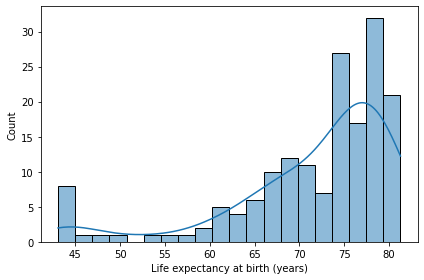

In [15]:
sns.histplot(x='LEABY', data=df, kde=True, bins=20)
plt.xlabel("Life expectancy at birth (years)")
plt.tight_layout()
plt.savefig("figs\hist_leaby.png", dpi=150)
plt.show()

From histogram above we can see that the distribution is skewed to the left, with most of the data are on the right side of the plot. 

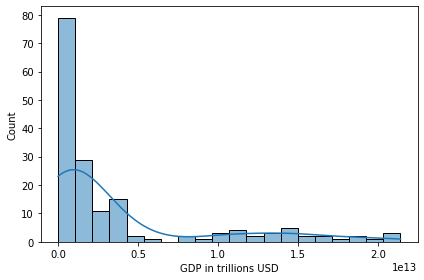

In [16]:
sns.histplot(x='GDP', data=df, kde=True, bins=20)
plt.xlabel("GDP in trillions USD")
plt.tight_layout()
plt.savefig("figs\hist_gdp.png", dpi=150)
plt.show()

Next we observe the distribution of GDP. Opposite to the life expectancy distribution, GDP distribution is skewed to the right, where most of the data are on the left side of the plot.

### Average Life Expectancy and GDP

In [17]:
df_mean = df.groupby('Country').mean().reset_index().drop('Year', axis=1)
df_mean

,Country,LEABY,GDP
0,Chile,78.599667,1.933642e+11
1,China,74.401143,6.936190e+12
2,Germany,79.857724,3.250476e+12
3,India,66.501381,1.560714e+12
4,Indonesia,69.034048,6.451905e+11
5,Mexico,75.013286,1.032381e+12
6,United States of America,78.024274,1.555238e+13
7,Zimbabwe,51.636857,1.225276e+10


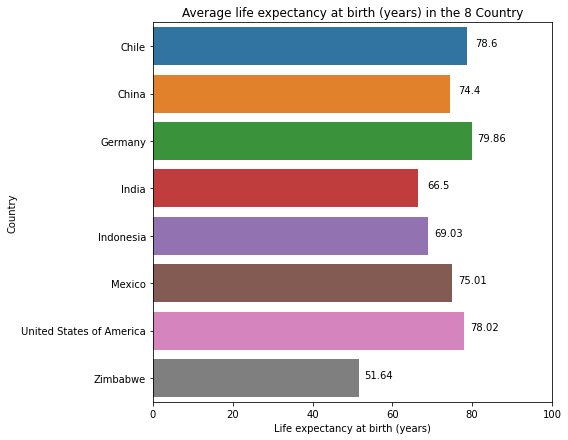

In [18]:
# create the plot
plt.figure(figsize=(8,6))
sns.barplot(x='LEABY',
            y='Country',
            data=df_mean,
            orient='h')
plt.xlabel('Life expectancy at birth (years)')
plt.xlim(0, 100)
plt.tight_layout()

# create label value for each bar
x = df_mean['LEABY'].round(2)
y = df_mean['Country']

countlist = range(len(y))

for i in countlist:
    plt.text(x = x[i]+5, y=countlist[i], s = x[i], size=10, ha='center')

# create title and save plot
plt.title('Average life expectancy at birth (years) in the 8 Country')
plt.savefig("figs/bar_avg_leaby.png", dpi=150)
plt.show()

Germany, Chile, United States of America, Mexico and China has relatively close life expectancy between 70 and 80 years, while India and Indonesia seems to be between 65 and 70 years. Zimbabwe shows a very low average life expectancy compared to other country, showing only average life expectancy at 51 years.

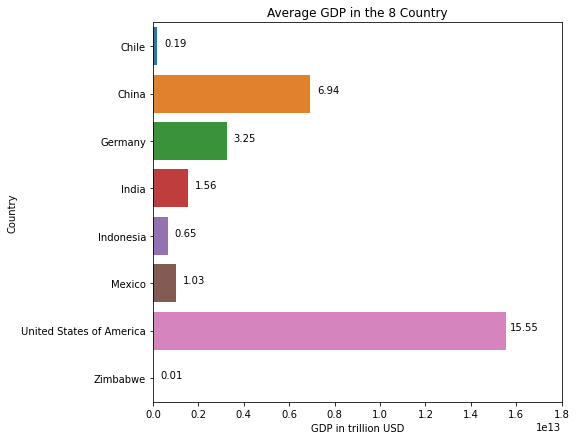

In [19]:
fig, ax = plt.subplots(1,1, figsize=(8, 6))
sns.barplot(x='GDP',
            y='Country',
            data=df_mean,
            orient='h')
plt.tight_layout()

x = df_mean['GDP'].round(2)
x = round(x/10**12, 2)
y = df_mean['Country']

countlist = range(len(y))

for i in countlist:
    plt.text(x = x[i]*10**12 + 8*10**11, y=countlist[i], s = x[i], size=10, ha='center')

plt.title('Average GDP in the 8 Country')
plt.savefig("figs/bar_avg_gdp.png", dpi=150)
plt.xlabel('GDP in trillion USD')
plt.xlim(0, 1.8*10**13)
plt.show()

This figure shows that USA has far higher average GDP than other country. Chile is barely seen and Zimbabwe is not even visible.

### Distribution of Life Expectancy and GDP

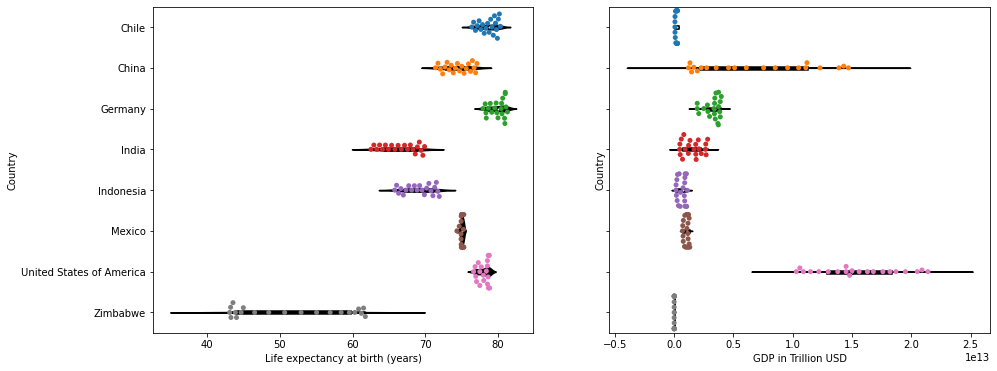

In [20]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(15,6))
axes[0] = sns.violinplot(ax=axes[0], x='LEABY', y='Country', data=df, color='black')
axes[0] = sns.swarmplot(ax=axes[0], x='LEABY', y='Country', data=df)
axes[0].set_xlabel("Life expectancy at birth (years)")
axes[1] = sns.violinplot(ax=axes[1], x='GDP', y='Country', data=df, color='black')
axes[1] = sns.swarmplot(ax=axes[1], x='GDP', y='Country', data=df)
axes[1].set_xlabel("GDP in Trillion USD")
plt.savefig("figs/violin_swarm.png", dpi=150)
plt.show()

In these swarm plot, each dot represents value for each year. We can see more clearly the spread of life expectancy and GDP across eight countries. Zimbabwe, having lowest GDP also shows the lowest life expectancy. For other country its varied. For example, despite USA having the highest GDP, its average life expectancy ranks in third.

Life expectancy in Zimbabwe is more distributed in each year, compared to other countries where the dot seemed swarmed together. The opposite happens in GDP, where Zimbabwe shows a vertical line in its value indicating that Zimbabwe's GDP growth is not as high as other country. China's GDP growth is interesting, while the lowest value is lower than Germany's lowest GDP point, its highest point is far exceeding Germany's highest GDP point.

Another interesting observation is India and Indonesia. India has higher GDP than Indonesia, but Indonesia life expectancy at birth seems a bit higher than India.

To see better how each country's life expectancy and GDP changes across year, we will visualize it using line plot.

### Life Expectancy and GDP Change Over Time

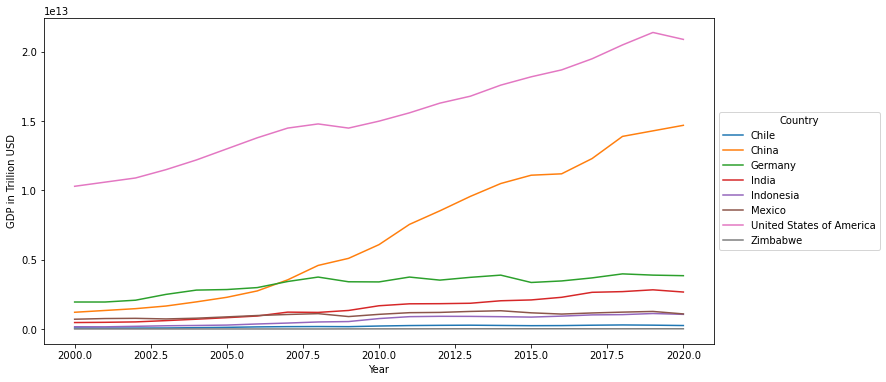

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GDP', hue='Country', data=df)
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillion USD")
plt.savefig("figs/line_gdp.png", dpi=150)
plt.show()

By using line plot, we can see how GDP changes every year. USA and China shows substantial gains between 2000-2020. India, Indonesia, Germany, Mexico and Chile appear to have increased GDP as well. Zimbabwe seems to be stagnant like shown in the swarm plot. Though maybe this is because of scale, we will check it further later.

There is one interesting observation. We see that initially China GDP is lower than Germany, but with China's GDP that grow so high, at 2020 its China GDP is far above Germany's.

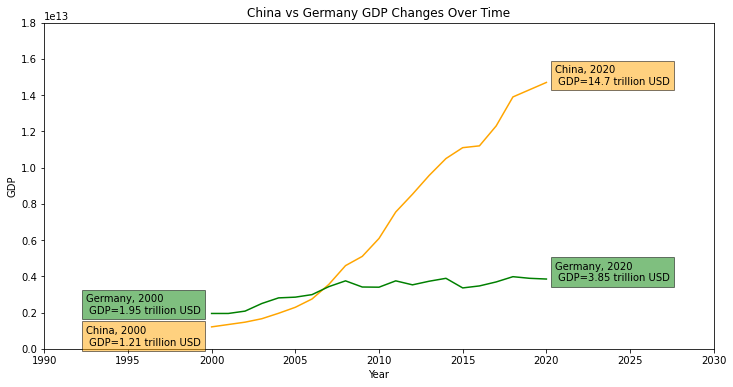

In [22]:
# create label for value in plot
china_gdp_2020 = df[(df['Country'] == 'China') & (df['Year'] == 2020)].reset_index()._get_value(0, 'GDP')
china_gdp_2000 = df[(df['Country'] == 'China') & (df['Year'] == 2000)].reset_index()._get_value(0, 'GDP')
china_gdp_2000_str = str(china_gdp_2000/10 ** 12) + ' trillion USD'
china_gdp_2020_str = str(china_gdp_2020/10 ** 12) + ' trillion USD'

germany_gdp_2020 = df[(df['Country'] == 'Germany') & (df['Year'] == 2020)].reset_index()._get_value(0, 'GDP')
germany_gdp_2000 = df[(df['Country'] == 'Germany') & (df['Year'] == 2000)].reset_index()._get_value(0, 'GDP')
germany_gdp_2000_str = str(germany_gdp_2000/10 ** 12) + ' trillion USD'
germany_gdp_2020_str = str(germany_gdp_2020/10 ** 12) + ' trillion USD'

# create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='GDP', data=df[df['Country'] == 'China'], color='orange')
sns.lineplot(x='Year', y='GDP', data=df[df['Country'] == 'Germany'], color='green')
plt.text(2020.5, china_gdp_2020 - 10**11, f"China, 2020 \n GDP={china_gdp_2020_str}", bbox = dict(facecolor = 'orange', alpha = 0.5))
plt.text(2020.5, germany_gdp_2020 - 10**11, f"Germany, 2020 \n GDP={germany_gdp_2020_str}", bbox = dict(facecolor = 'green', alpha = 0.5))
plt.text(1992.5, china_gdp_2000 - 10**12, f"China, 2000 \n GDP={china_gdp_2000_str}", bbox = dict(facecolor = 'orange', alpha = 0.5))
plt.text(1992.5, germany_gdp_2000 - 10**9, f"Germany, 2000 \n GDP={germany_gdp_2000_str}", bbox = dict(facecolor = 'green', alpha = 0.5))
plt.xlim(1990, 2030)
plt.ylim(0, 1.8*10**13)

plt.title('China vs Germany GDP Changes Over Time')
plt.savefig("figs/line_gdp_china_germany.png", dpi=150)
plt.show()

In 2000, China have lower GDP than Germany. But starting from 2003, we can see China's GDP start to increase rapidly. In 2007, China's GDP have been higher than Germany's and by 2020, China's GDP is more than 3 times higher than Germany!

What caused China's significant GDP growth? An article from [Forbes](https://www.forbes.com/sites/peterpham/2018/03/06/is-there-a-secret-growth-hormone-added-to-chinas-economy/?sh=126c4c43f135) explains China’s rise to peerless GDP growth is caused by its large population, skyrockets of its capital investment and more efficient manufacturing process. Our findings in data matched the real world scenario for GDP growth in China

Next, we will see how GDP changes for each country, adjusted with different scale.

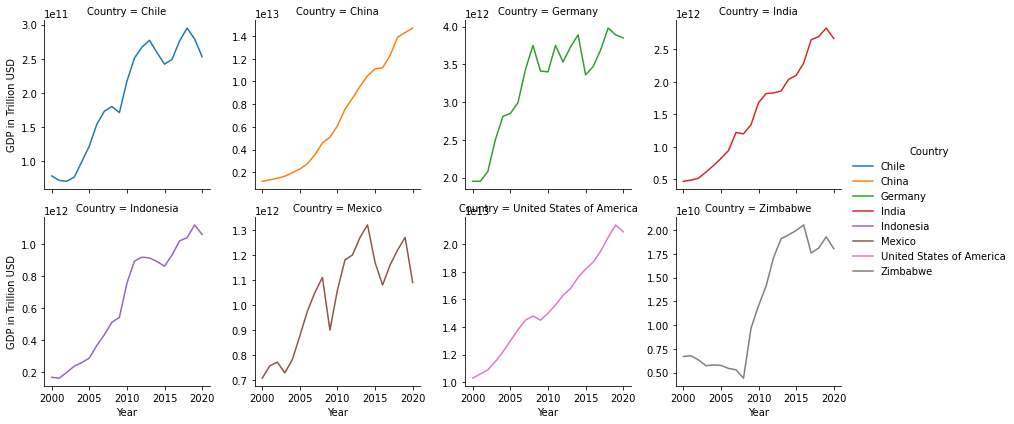

In [23]:
gdpgraph = sns.FacetGrid(df, col='Country', col_wrap=4, hue='Country', sharey=False)
gdpgraph.map(sns.lineplot, 'Year', 'GDP')
gdpgraph.add_legend()
gdpgraph.set_axis_labels("Year", "GDP in Trillion USD")
plt.savefig("figs/line_gdp_all.png", dpi=150)
plt.show()

By seeing the graph of each country on different y-scale, we see that each country has increased GDP from 2000. China, India, Indonesia and USA have the smoothest growth, while other country seems quite fluctuating from 2000 to 2020. Zimbabwe experience decreased GDP from 2000 to 2008, then increased to 2015, but experience fluctuation again after that.

Let's see how life expectancy changes over time.

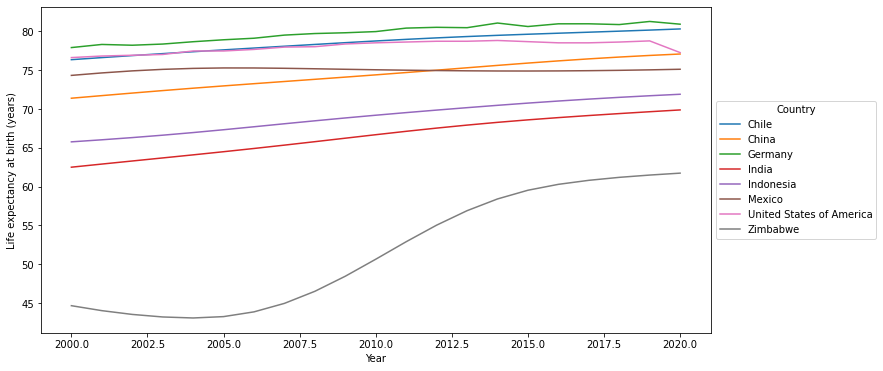

In [24]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='LEABY', hue='Country', data=df)
plt.legend(title='Country', loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)")
plt.savefig("figs/line_leaby.png", dpi=150)
plt.show()

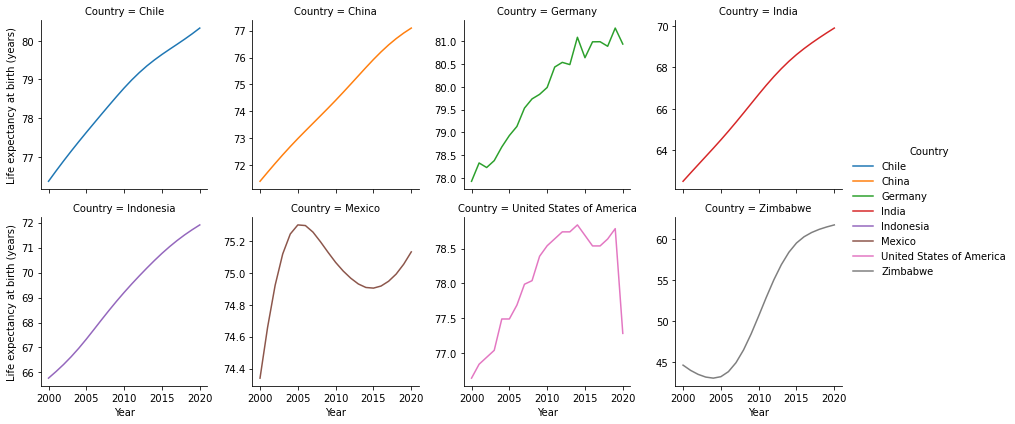

In [25]:
LEABYgraph = sns.FacetGrid(df, col='Country', col_wrap=4, hue='Country', sharey=False)
LEABYgraph.map(sns.lineplot, 'Year', 'LEABY')
LEABYgraph.add_legend()
LEABYgraph.set_axis_labels("Year", "Life expectancy at birth (years)")
plt.savefig("figs/lineall_leaby.png", dpi=150)
plt.show()

The chart shows that every country has their life expectancy increased in 2020 compared to 2000. The difference in **how** the life expectancy changes in every country is quite notable. Some patterns we find from these line charts are:

- Chile, China, India and Indonesia has quite smooth increase in their life expectancy.
- Germany has increased life expectancy, though it appears fluctuating from 2015 to 2020.
- Zimbabwe having decreased life expectancy from 2000 to 2005, but start to increase after 2005. The increment even seems more exponential than linear; even so its life expectancy in 2020 is still lower than other countries.
- Mexico has increased life expectancy start from 2000 but it steeply decrease from 2005 to 2015. An article from [borgenproject.org](https://borgenproject.org/life-expectancy-in-mexico/#:~:text=Between%202005%20and%202015%2C%20average,women%20and%2071.9%20for%20men.) explains this decrease is caused by increased mortality levels in older adults and deaths related to diabetes mellitus and violent causes. We can explore it further in future research.
- USA experience decreased life expectancy in 2020 is likely caused by COVID-19. This article from [PNAS](https://www.pnas.org/doi/10.1073/pnas.2014746118) expects that COVID-19 will reduce life expectancy in US in 2020 by 1.13 year. Compared to our dataset, the life expectancy decrease is higher at 1.5 year.

USA is one of the country that reported first case of COVID-19 in early 2020 and still, to this day, remains as the country with highest total cases of COVID-19 ([Worldmeters.info](https://www.worldometers.info/coronavirus/)). In the time this project was made, life expectancy data for 2021 was not available yet. But we expect the life expectancy to decrease for many country all over the globe, similar to USA.

### Correlation of GDP and Life Expectancy

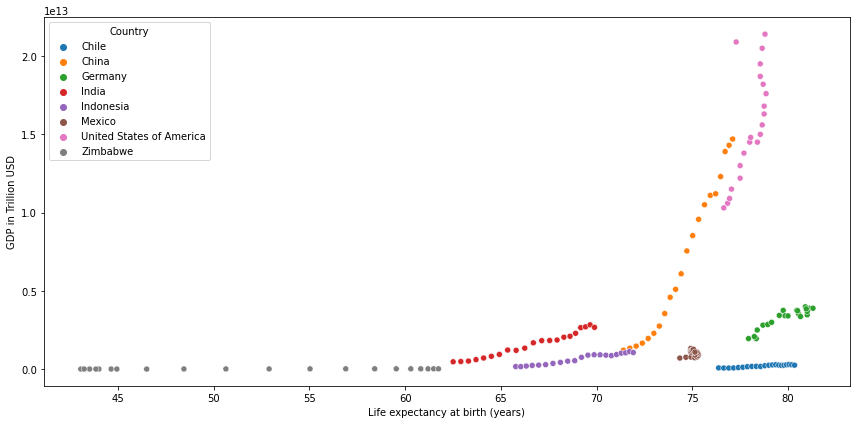

In [26]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LEABY', y='GDP', data=df, hue='Country')
plt.legend(title='Country', loc='best')
plt.xlabel("Life expectancy at birth (years)")
plt.ylabel("GDP in Trillion USD")
plt.tight_layout()
plt.savefig("figs/scatterplot.png", dpi=150)
plt.show()

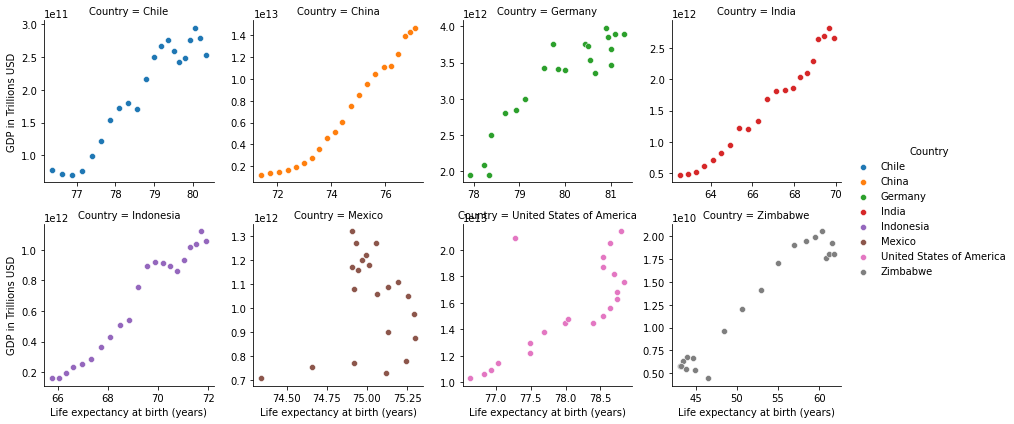

,Country,Pearson correlation,Spearman correlation
0,Chile,0.960211,0.910390
1,China,0.982216,1.000000
2,Germany,0.920303,0.846279
3,India,0.987204,0.994805
4,Indonesia,0.979451,0.975325
5,Mexico,0.137925,-0.144852
6,United States of America,0.723158,0.730169
7,Zimbabwe,0.967218,0.819481


In [27]:
graph = sns.FacetGrid(df, col='Country', col_wrap=4, hue='Country', sharey=False, sharex=False)
graph.map(sns.scatterplot, 'LEABY', 'GDP')
graph.add_legend()
graph.set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions USD")
plt.savefig("figs/scatterplot_all.png", dpi=150)
plt.show()

# calculating pearson and spearman correlation for each country
countries = df.Country.unique()
pearson_corr_list = []
for i in countries:
    corr, p = pearsonr(df.LEABY[df.Country == i], df.GDP[df.Country == i])
    pearson_corr_list.append(corr)

spearman_corr_list = []
for i in countries:
    corr, p = spearmanr(df.LEABY[df.Country == i], df.GDP[df.Country == i])
    spearman_corr_list.append(corr)    
    
# convert the correlation list to dataframe
corr_df = pd.DataFrame({'Country': countries, 'Pearson correlation': pearson_corr_list, 'Spearman correlation': spearman_corr_list})
corr_df

By looking at the scatter plot, we can see there is linear relationship between GDP and Life expectancy for each country except for Mexico. Mexico chart distribution shows no identifiable pattern, this is perhaps caused by high rates of flucatuation in GDP and life expectancy from 2005 to 2020.

Except for Mexico,  all country shows strong positive relationship. USA having the least strong correlation at 0.73 while for other country it is over 0.8. China's continual GDP increase every year always followed by increase in life expectancy, which result in Spearman correlation to have value of 1.

We also notice an outlier in USA chart. We expect this is the data point for year 2020 when COVID-19 hits.

Let's explore further by filters USA data before pandemic (before year 2020) and see if it cause a change to our chart and correlation.

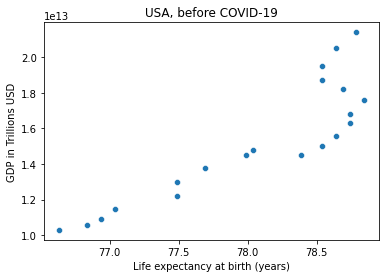

Correlation of LEABY and GDP in USA before COVID-19:
- Pearson correlation: 0.8826660844585339
- Spearman correlation: 0.8697291622427072


In [28]:
usa_pre_covid = df[(df['Country'] == 'United States of America') & df['Year'].isin(range(2000, 2020))]
sns.scatterplot('LEABY', 'GDP', data=usa_pre_covid)
plt.xlabel('Life expectancy at birth (years)')
plt.ylabel('GDP in Trillions USD')
plt.title('USA, before COVID-19')
plt.show()

corrpearson, p = pearsonr(usa_pre_covid.LEABY, usa_pre_covid.GDP)
corrspearman, p = spearmanr(usa_pre_covid.LEABY, usa_pre_covid.GDP)
print('Correlation of LEABY and GDP in USA before COVID-19:')
print(f'- Pearson correlation: {corrpearson}')
print(f'- Spearman correlation: {corrspearman}')

When we drop the data points in 2020, the correlation is much higher at 0.88 and 0.86.

## Conclusion
***
Through working with the data set, we've found some interesting conclusions:
- Life expectancy at birth increased over time in all 8 countries, with Zimbabwe having the largest increase.
- GDP has increased over time as well, especially for China.
- Life expectancy for the 8 countries is skewed to the left, with most of the observation is on the right side of the histogram.
- Average life expectancy is between mid 60s to high 70s, except for Zimbabwe which is 51 years.
- There is a strong relationship between GDP and life expectancy, where most of the country shows correlation above 0.9.

## Future Directions
***
Some interesting question we can explore further from this study is:
- Zimbabwe's GDP dropped from 2000 to 2008, is there particular reason that caused it?
- Are there other variable that largely affect life expectancy of a country? Some variable we can explore is infant deaths and BMI.

Thank you for visiting my project! 😃✌